In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [28]:
df= pd.read_csv('../datasets/50_Startups.csv')

In [29]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


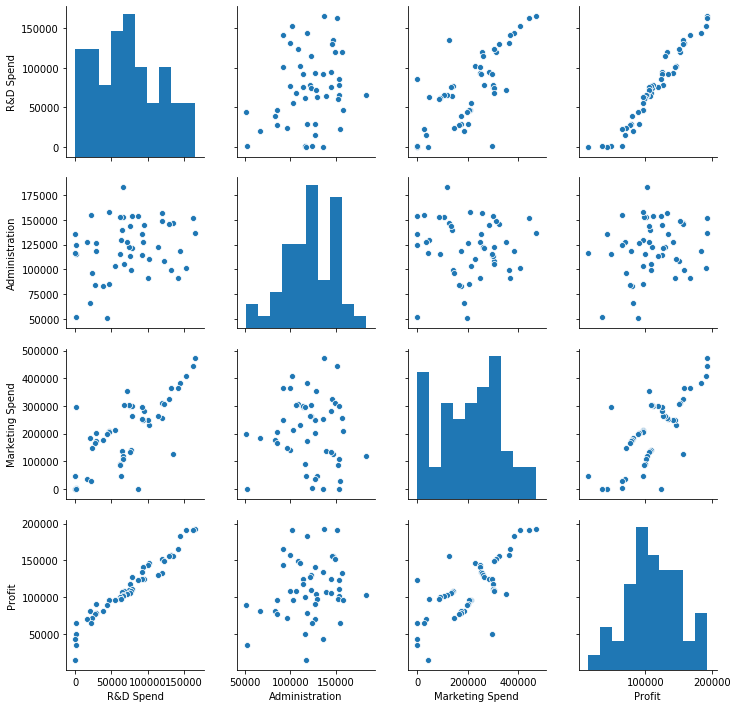

In [30]:
sns.pairplot(df)

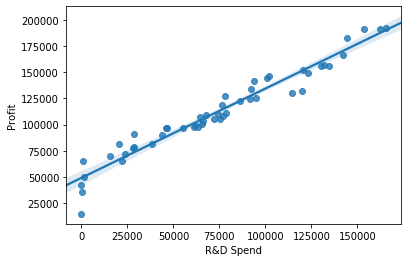

In [31]:
sns.regplot('R&D Spend','Profit',data=df)
plt.show()

## multiple linear regression

In [32]:
x=df[['R&D Spend','Administration',	'Marketing Spend','State']]
y=df['Profit']

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
state_enc=LabelEncoder()
x['State']=state_enc.fit_transform(x['State'])
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [35]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.2)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)
score=reg.score(xtest,ytest)*100
ypred=reg.predict(xtrain)

In [38]:
ytrain.shape

(40,)

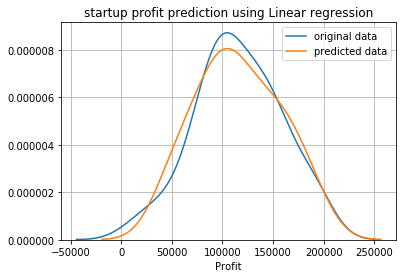

In [39]:
sns.distplot(ytrain,label='original data',hist=False)
sns.distplot(ypred,label='predicted data',hist=False)
plt.title('startup profit prediction using Linear regression')
plt.legend()
plt.grid(True)
plt.savefig('../graphs/start_up_prediction.png')

In [40]:
from utils import save_model

In [41]:
# store info in a dict
startup_predictor = {
    'model': reg,
    'state_encoder': state_enc,
    'description':'blah blah blah'
}
save_model(startup_predictor,'../models/startup_predictor.pk')

model saved


## Input data into the reg model and print the profit

In [42]:
rnd = float(input('enter R&D Spend	'))
adm = float(input('enter Administration'))
mark = float(input('enter Marketing Spend'))
state = float(input('enter State'))
x = np.array([[rnd,adm,mark,state]])
reg.predict(x)[0]

339469.9338707292